In [1]:
from nsaba import Nsaba
from nsaba import analysis
import os
%matplotlib inline

In [2]:
data_dir = "../../data_dir"

In [3]:
# loading class DataFrames
Nsaba.aba_load(data_dir)
Nsaba.ns_load(data_dir)

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.



In [29]:
# Intializing instance and loading gene expression
tsaba = Nsaba()
tsaba.load_ge_pickle(path=data_dir)

This may take a minute or two ...
'ge' dictionary successfully loaded


In [65]:
term = 'reward'
tsaba.is_term(term)

True

In [66]:
tsaba.get_ns_act(term, thresh=-1, search_radii=2.5)

This may take a few minutes...


In [67]:
anal = analysis.NsabaAnalysis(tsaba)

To use seaborn plotting functionality in Jupyter, '%matplotlib inline' must be enabled


t-value: -5.3763 
p-value: 9.847E-08
Effect size: -0.5183 



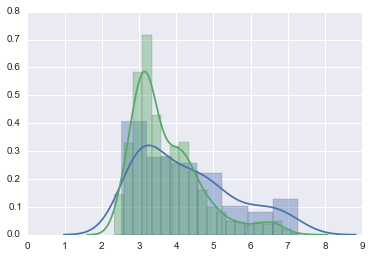

In [68]:
anal.t_test(term, 1813 , 85)

In [69]:
ttest_metr = anal.t_test_multi(term)

This may take a couple of minutes ...


In [70]:
anal.fetch_gene_descriptions(ttest_metr)

Fetching NIH gene descriptions ...

Corrected Bonferroni Alpha: 2.405E-06


253970 (p = 4.522E-10; d = -0.608): < No description found >


5456 (p = 9.458E-09; d = -0.559): This gene encodes a member of the POU-III class of neural transcription factors. This family member plays a role in inner ear development. The protein is thought to be involved in the mediation of epigenetic signals which induce striatal neuron-precursor differentiation. Mutations in this gene are associated with X chromosome-linked nonsyndromic mixed deafness. [provided by RefSeq, Dec 2012]


152573 (p = 2.272E-08; d = -0.544): < No description found >


54874 (p = 2.860E-08; d = -0.540): The protein encoded by this gene binds to both CDC42 and N-WASP. This protein promotes CDC42-induced actin polymerization by activating the N-WASP-WIP complex and, therefore, is involved in a pathway that links cell surface signals to the actin cytoskeleton. Alternative splicing results in multiple transcript variants encoding dif

Percent Significant (Bonferroni Correction; alpha = .05): 0.173 %


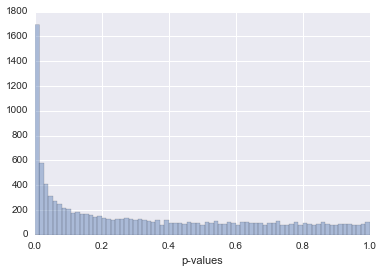

In [71]:
anal.p_val_distr(ttest_metr)

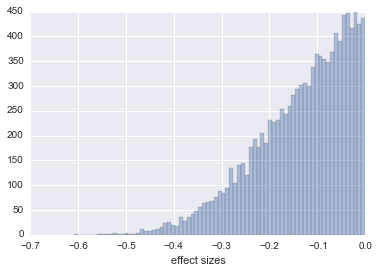

In [72]:
anal.effect_size_distr(ttest_metr)

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt